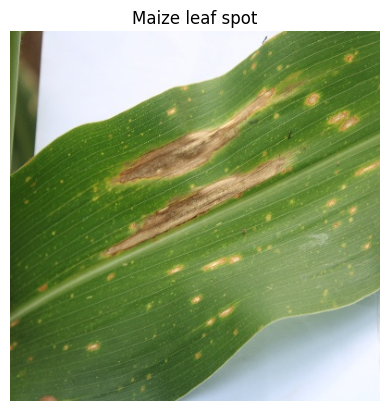

(400, 400, 3)
/home/wouter/code/MahautHDL/save_the_crops/raw_data/
['Cassava brown spot', 'Cassava mosaic', 'Cassava green mite', 'Tomato leaf blight', 'Cashew leaf miner', 'Cassava healthy', 'Cassava bacterial blight', 'Cashew gumosis', 'Maize leaf blight', 'Maize fall armyworm', 'Tomato leaf curl', 'Tomato verticulium wilt', 'Maize grasshoper', 'Maize streak virus', 'Cashew red rust', 'Tomato healthy', 'Cashew healthy', 'Maize leaf beetle', 'Cashew anthracnose', 'Tomato septoria leaf spot', 'Maize leaf spot', 'Maize healthy']


In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ! unzip -n ~/code/MahautHDL/save_the_crops/raw_data/crop.zip -d ~/code/MahautHDL/save_the_crops/raw_data

data_link = os.environ.get("LOCAL_PATH")

crops = os.listdir(data_link)
plant_disease = np.random.randint(0, len(crops))
plant_disease_name = crops[plant_disease]

os.chdir(f'{data_link}{plant_disease_name}')

link = os.listdir(f"{data_link}{plant_disease_name}")
rand_pic_nr = np.random.randint(0, len(link))

img = plt.imread(link[rand_pic_nr])

plt.imshow(img)
plt.axis(False)
plt.title(plant_disease_name)
plt.show()
print(img.shape)
print(data_link)
print(crops)


In [31]:
import tensorflow as tf
import os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# from tensorflow import keras

def import_and_preprocess_pictures(directory=data_link):
    delete_list = []

    crops = os.listdir(data_link)

    for i in range(0,len(crops)):
        plant_disease_name = crops[i]
        os.chdir(f'{data_link}{plant_disease_name}')

        filenames = os.listdir(f"{data_link}{plant_disease_name}")

        for index, filename in enumerate(filenames):
            if filename.endswith(".jpg"):

                try:
                    tensor_img = plt.imread(filename)

                except:
                    delete_list.append(f'{plant_disease_name} - {filename}')
            else:
                pass

    return delete_list

In [32]:
to_delete = import_and_preprocess_pictures()

In [34]:
len(to_delete)

50

In [3]:
    # tf.keras.preprocessing.image_dataset_from_directory(
    #     # directory=os.environ.get("LOCAL_PATH"),
    #     directory=data_link,
    #     labels='inferred',
    #     image_size=(224,224),
    #     # class_names=
    #     label_mode="categorical",
    #     batch_size=32
    # )